In [79]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 
import statsmodels.api as sm
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Problem 3
Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

3.2 Is the mean hardness of the polished and unpolished stones the same?

In [33]:
ZingaroData = pd.read_csv('Zingaro_Company.csv')
ZingaroData

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
...,...,...
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530


In [4]:
ZingaroData.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [5]:
ZingaroData.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


### Step 1: Define null and alternative hypotheses

3.1 One-Sample t-Test for Unpolished Stones:

#### Hypotheses
Null Hypothesis (H0): The mean hardness of unpolished stones is at least 150.
Alternative Hypothesis (Ha): The mean hardness of unpolished stones is less than 150.


### Step 2: Decide the significance level¶

#### Here we select  𝛼 = 0.05 and the population standard deviation is not known.


### Step 3: Identify the test statistic

#### We have 1 samples and we do not know the population standard deviation.
The sample is a large sample, n > 30. So you use 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test.

In [140]:
import scipy.stats as stats

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(ZingaroData['Unpolished '], 150, alternative='less')

# Print the p-value
print("p-value:", p_value)
print("tstat-value:",t_stat)

p-value: 4.171286997419652e-05
tstat-value: -4.164629601426757


Since p_value is less than 0.05 level of significance we reject null hypothesis.The mean hardness of unpolished stones is less than 150 not exactly or at least 150.

3.2 Two-Sample t-Test for Mean Hardness (Polished vs. Unpolished Stones):   

#### Hypotheses:

Null Hypothesis(H0): The mean hardness of polished stones is equal to the mean hardness of unpolished stones.
Alternative Hypothesis (Ha): The mean hardness of polished stones is not equal to the mean hardness of unpolished stones.

In [141]:
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(ZingaroData['Treated and Polished'], ZingaroData['Unpolished '], equal_var=False)

# Print the p-value
print("p-value:", p_value)
print("tstat-value:",t_stat)

p-value: 0.001588379295584306
tstat-value: 3.242232050141406


Since p_value is less than 0.05 level of isgnificance we reject null hypothesis. We accept that the mean hardness of polished stones is not equal to the mean hardness of unpolished stones.


## Problem 2
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [47]:
from scipy.stats import norm
mean = 5
std = 1.5

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

In [50]:
X = 3.17
z = (X-mean)/std
print("The value of z is", z)
p = round(stats.norm.cdf(z),4)
print('Proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is', p)

The value of z is -1.22
Proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is 0.1112


2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

In [51]:
X = 3.6
z = (X-mean)/std
print("The value of z is", z)
p = round(1 - stats.norm.cdf(z),4)
print('Proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm is', p)

The value of z is -0.9333333333333332
Proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm is 0.8247


2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [52]:
X1 = 5.5
z1 = (X1-mean)/std
print("The value of z1 is", z1)
X2 = 5
z2 = (X2-mean)/std
print("The value of z2 is", z2)
p = round(stats.norm.cdf(z1) - stats.norm.cdf(z2), 4)
print ('Proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm', p)

The value of z1 is 0.3333333333333333
The value of z2 is 0.0
Proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm 0.1306


2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?


In [99]:
X1 = 7.5
z1 = (X1-mean)/std
print("The value of z1 is", z1)
X2 = 3
z2 = (X2-mean)/std
print("The value of z2 is", z2)
p = round((1- stats.norm.cdf(z1)) + stats.norm.cdf(z2), 4)
print ('Proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm', p)


The value of z1 is 1.6666666666666667
The value of z2 is -1.3333333333333333
Proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm 0.139


### Problem 4
Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.


In [85]:
Dental_Data = pd.read_excel('DentalHardnessdata.xlsx')
Dental_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


In [86]:
Dental_Data.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
3,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
4,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN


In [87]:
Dental_Data.describe()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6
count,90.000000,90.000000,90.000000,90.000000,90.000000,0.0,0.0
mean,3.000000,2.000000,1.500000,1600.000000,741.777778,NaN,NaN
std,1.422136,0.821071,0.502801,82.107083,145.767845,NaN,NaN
min,1.000000,1.000000,1.000000,1500.000000,289.000000,NaN,NaN
25%,2.000000,1.000000,1.000000,1500.000000,698.000000,NaN,NaN
50%,3.000000,2.000000,1.500000,1600.000000,767.000000,NaN,NaN
75%,4.000000,3.000000,2.000000,1700.000000,824.000000,NaN,NaN
max,5.000000,3.000000,2.000000,1700.000000,1115.000000,NaN,NaN


In [142]:
Dental_Data.Method = pd.Categorical(Dental_Data.Method)
Dental_Data.Method

C:\Users\subra\anaconda3\Lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
Name: Method, Length: 107, dtype: category
Categories (3, float64): [1.0, 2.0, 3.0]

In [143]:
Dental_Data.Dentist = pd.Categorical(Dental_Data.Dentist)
Dental_Data.Dentist

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
Name: Dentist, Length: 107, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

In [144]:
Dental_Data.Alloy = pd.Categorical(Dental_Data.Alloy)
Dental_Data.Alloy

0      1.0
1      1.0
2      1.0
3      2.0
4      2.0
      ... 
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
Name: Alloy, Length: 107, dtype: category
Categories (2, float64): [1.0, 2.0]

In [91]:
Dental_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Dentist      90 non-null     category
 1   Method       90 non-null     category
 2   Alloy        90 non-null     category
 3   Temp         90 non-null     float64 
 4   Response     90 non-null     float64 
 5   Unnamed: 5   0 non-null      float64 
 6   Unnamed: 6   0 non-null      float64 
 7   Unnamed: 7   102 non-null    object  
 8   Unnamed: 8   100 non-null    object  
 9   Unnamed: 9   100 non-null    object  
 10  Unnamed: 10  99 non-null     object  
 11  Unnamed: 11  98 non-null     object  
 12  Unnamed: 12  3 non-null      object  
 13  Unnamed: 13  3 non-null      object  
dtypes: category(3), float64(4), object(7)
memory usage: 10.1+ KB


4.1 How does the hardness of implants vary depending on dentists?

In [182]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, data=Dental_Data[Dental_Data['Alloy'] == 1]).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [183]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, data=Dental_Data[Dental_Data['Alloy'] == 2]).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


4.2 How does the hardness of implants vary depending on methods?

In [175]:
formula = 'Response ~ C(Method)'
model = ols(formula,  data=Dental_Data[Dental_Data['Alloy'] == 1]).fit()
aov_table = anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [176]:
formula = 'Response ~ C(Method)'
model = ols(formula,  data=Dental_Data[Dental_Data['Alloy'] == 2]).fit()
aov_table = anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [181]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = Dental_Data['Alloy'], groups = Dental_Data['Method'], alpha = 0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   1.0    2.0      0.0   nan   nan   nan  False
   1.0    3.0      0.0   nan   nan   nan  False
   1.0    nan      nan   nan   nan   nan  False
   2.0    3.0      0.0   nan   nan   nan  False
   2.0    nan      nan   nan   nan   nan  False
   3.0    nan      nan   nan   nan   nan  False
-----------------------------------------------


 4.3 What is the interaction effect between the dentist and method on the hardness
of dental implants for each type of alloy?

In [193]:
formula = 'Response ~ C(Temp)'
model = ols(formula,  data=Dental_Data[Dental_Data['Alloy'] == 1]).fit()
aov_table = anova_lm(model)
print(aov_table)

            df         sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0   10154.444444   5077.222222  0.335224  0.717074
Residual  42.0  636122.800000  15145.780952       NaN       NaN


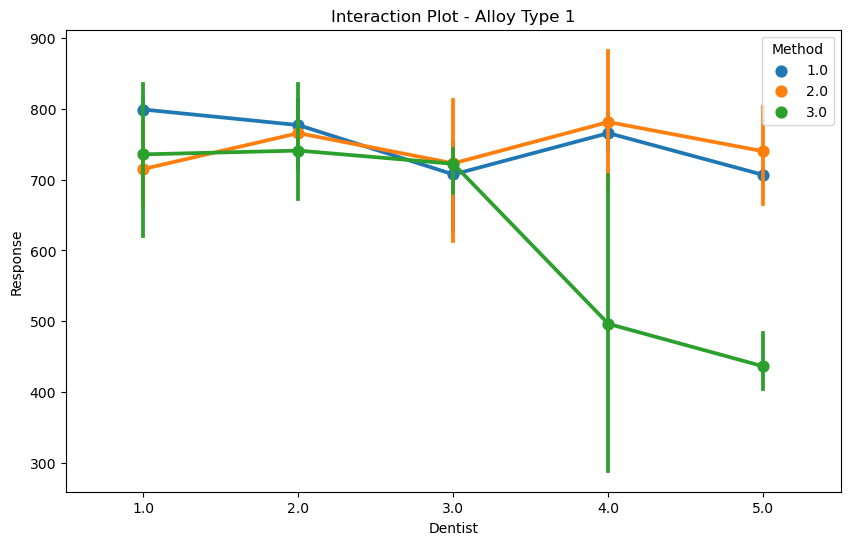

In [191]:
# Create Interaction Plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Dentist', y='Response', hue='Method', data=Dental_Data[Dental_Data['Alloy']==1])

# Customize the plot
plt.title('Interaction Plot - Alloy Type 1')
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.legend(title='Method', loc='upper right')

# Show the plot
plt.show()

In [195]:
formula = 'Response ~ C(Temp)'
model = ols(formula,  data=Dental_Data[Dental_Data['Alloy'] == 2]).fit()
aov_table = anova_lm(model)
print(aov_table)

            df        sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0  9.374893e+04  46874.466667  1.883492  0.164678
Residual  42.0  1.045254e+06  24886.996825       NaN       NaN


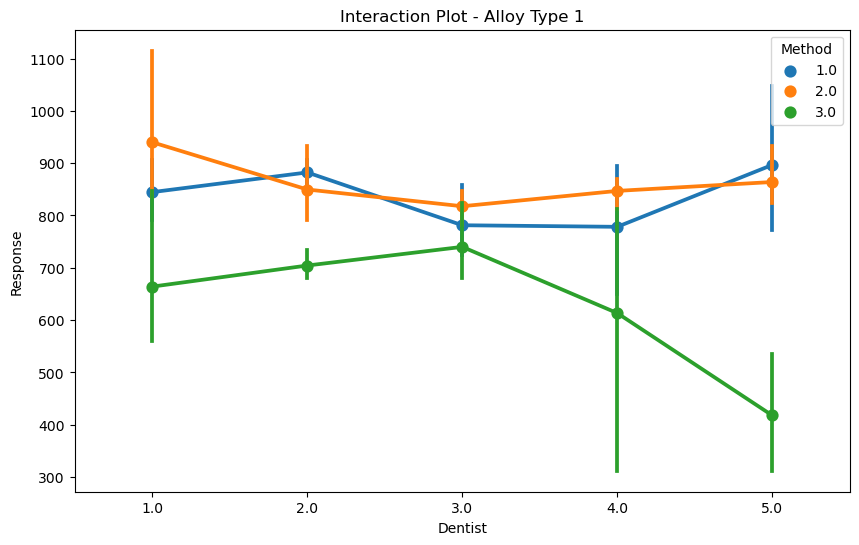

In [192]:
# Create Interaction Plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Dentist', y='Response', hue='Method', data=Dental_Data[Dental_Data['Alloy']==2])

# Customize the plot
plt.title('Interaction Plot - Alloy Type 1')
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.legend(title='Method', loc='upper right')

# Show the plot
plt.show()

4.4 How does the hardness of implants vary depending on dentists and methods together?

In [169]:
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula, data=Dental_Data[Dental_Data['Alloy'] == 1]).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  2.591255  0.051875
C(Method)    2.0  148472.177778  74236.088889  7.212522  0.002211
Residual    38.0  391121.377778  10292.667836       NaN       NaN


In [164]:
formula = 'Response ~ C(Dentist) * C(Method)'
model = ols(formula, data=Dental_Data[Dental_Data['Alloy'] == 1]).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


In [167]:
#type 2 alloy
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula, data=Dental_Data[Dental_Data['Alloy'] == 2]).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

              df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


In [168]:
formula = 'Response ~ C(Dentist) * C(Method)'
model = ols(formula, data=Dental_Data[Dental_Data['Alloy'] == 2]).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN
